In [ ]:
 # Libraries and pre-settings
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the dataset
ticker = '^GSPC'
df = yf.download(ticker)
df = df.xs(ticker, level='Ticker', axis=1)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Features
df['"ATR"'] = (df['High'] - df['Low']).rolling(5).mean()
df['High_last_5'] = df['High'].rolling(5).max()
df['Band'] = df['High_last_5'] - (df['"ATR"'] * 2.5)
df['Low_last_5'] = df['Low'].rolling(5).min()
df['Band2'] = df['Low_last_5'] + (df['"ATR"'] * 2.5)
df.dropna(axis=0, inplace=True)

In [ ]:
# Trading rules
df['Entry_Signal'] = np.nan
df['Exit_Signal'] = np.nan

aux = 0

for i in range(0, len(df)):
    if aux == 0  and df.iloc[i]['Close'] < df.iloc[i]['Band']:
        df.iloc[i, df.columns.get_loc('Entry_Signal')] = 1
        aux = 1
    elif aux == 1 and df.iloc[i]['Close'] > df.iloc[i - 1]['High']:
        df.iloc[i, df.columns.get_loc('Exit_Signal')] = 1
        aux = 0


In [ ]:
# Filtering only the signals to calculate returns
df = df.dropna(subset = ['Entry_Signal', 'Exit_Signal'], axis=0, how='all')

# Checking if there is no open trade without closing
if df['Entry_Signal'].sum() > df['Exit_Signal'].sum():
  df.drop(df.index[-1], inplace=True)

In [ ]:
# Calculating trade returns
df['Trade'] = df['Close'].pct_change(1)
df['Acc_trade'] = df['Trade'].cumsum() * 100

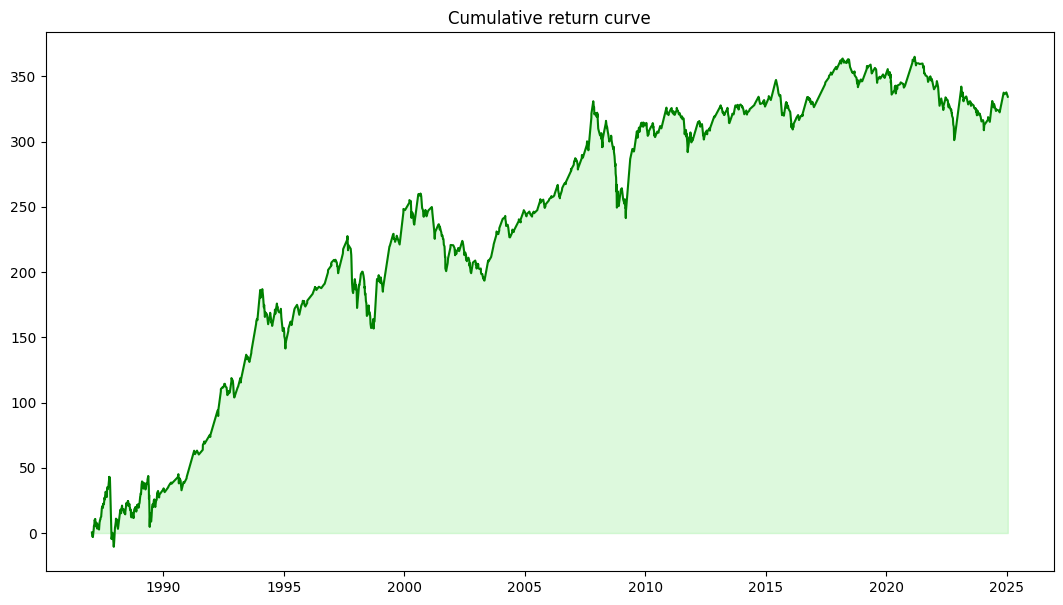

In [ ]:
# Plotting the cumulative return curve
plt.figure(figsize=(13,7))
plt.plot(df['Acc_trade'], color='green')
plt.fill_between(df.index, df['Acc_trade'], alpha=0.3, color='lightgreen')
plt.title('Cumulative return curve')
plt.show()